# Zero to Hero

## 2.01 Optimizacion Bayesiana

### Advertencia

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### El código

In [1]:
#Ejemplo de optimizacion bayesiana, univariada

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

library("data.table")
#paquetes necesarios para la Bayesian Optimization
library("DiceKriging")
library("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,614734,32.9,1321401,70.6,1321401,70.6
Vcells,1093620,8.4,8388608,64.0,1632451,12.5


Warning message:
"package 'data.table' was built under R version 4.2.3"
Warning message:
"package 'DiceKriging' was built under R version 4.2.3"
Warning message:
"package 'mlrMBO' was built under R version 4.2.3"
Loading required package: mlr

Warning message:
"package 'mlr' was built under R version 4.2.3"
Loading required package: ParamHelpers

Warning message:
"package 'ParamHelpers' was built under R version 4.2.3"
Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: smoof

Warning message:
"package 'smoof' was built under R version 4.2.3"
Loading required package: checkmate

Warning message:
"package 'checkmate' was built under R version 4.2.3"

Attaching package: 'checkmate'


The following object is masked from 'package:DiceKriging':

    checkNames




### Defino la funcion a optimizar, un polinomio de grado 4

In [2]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

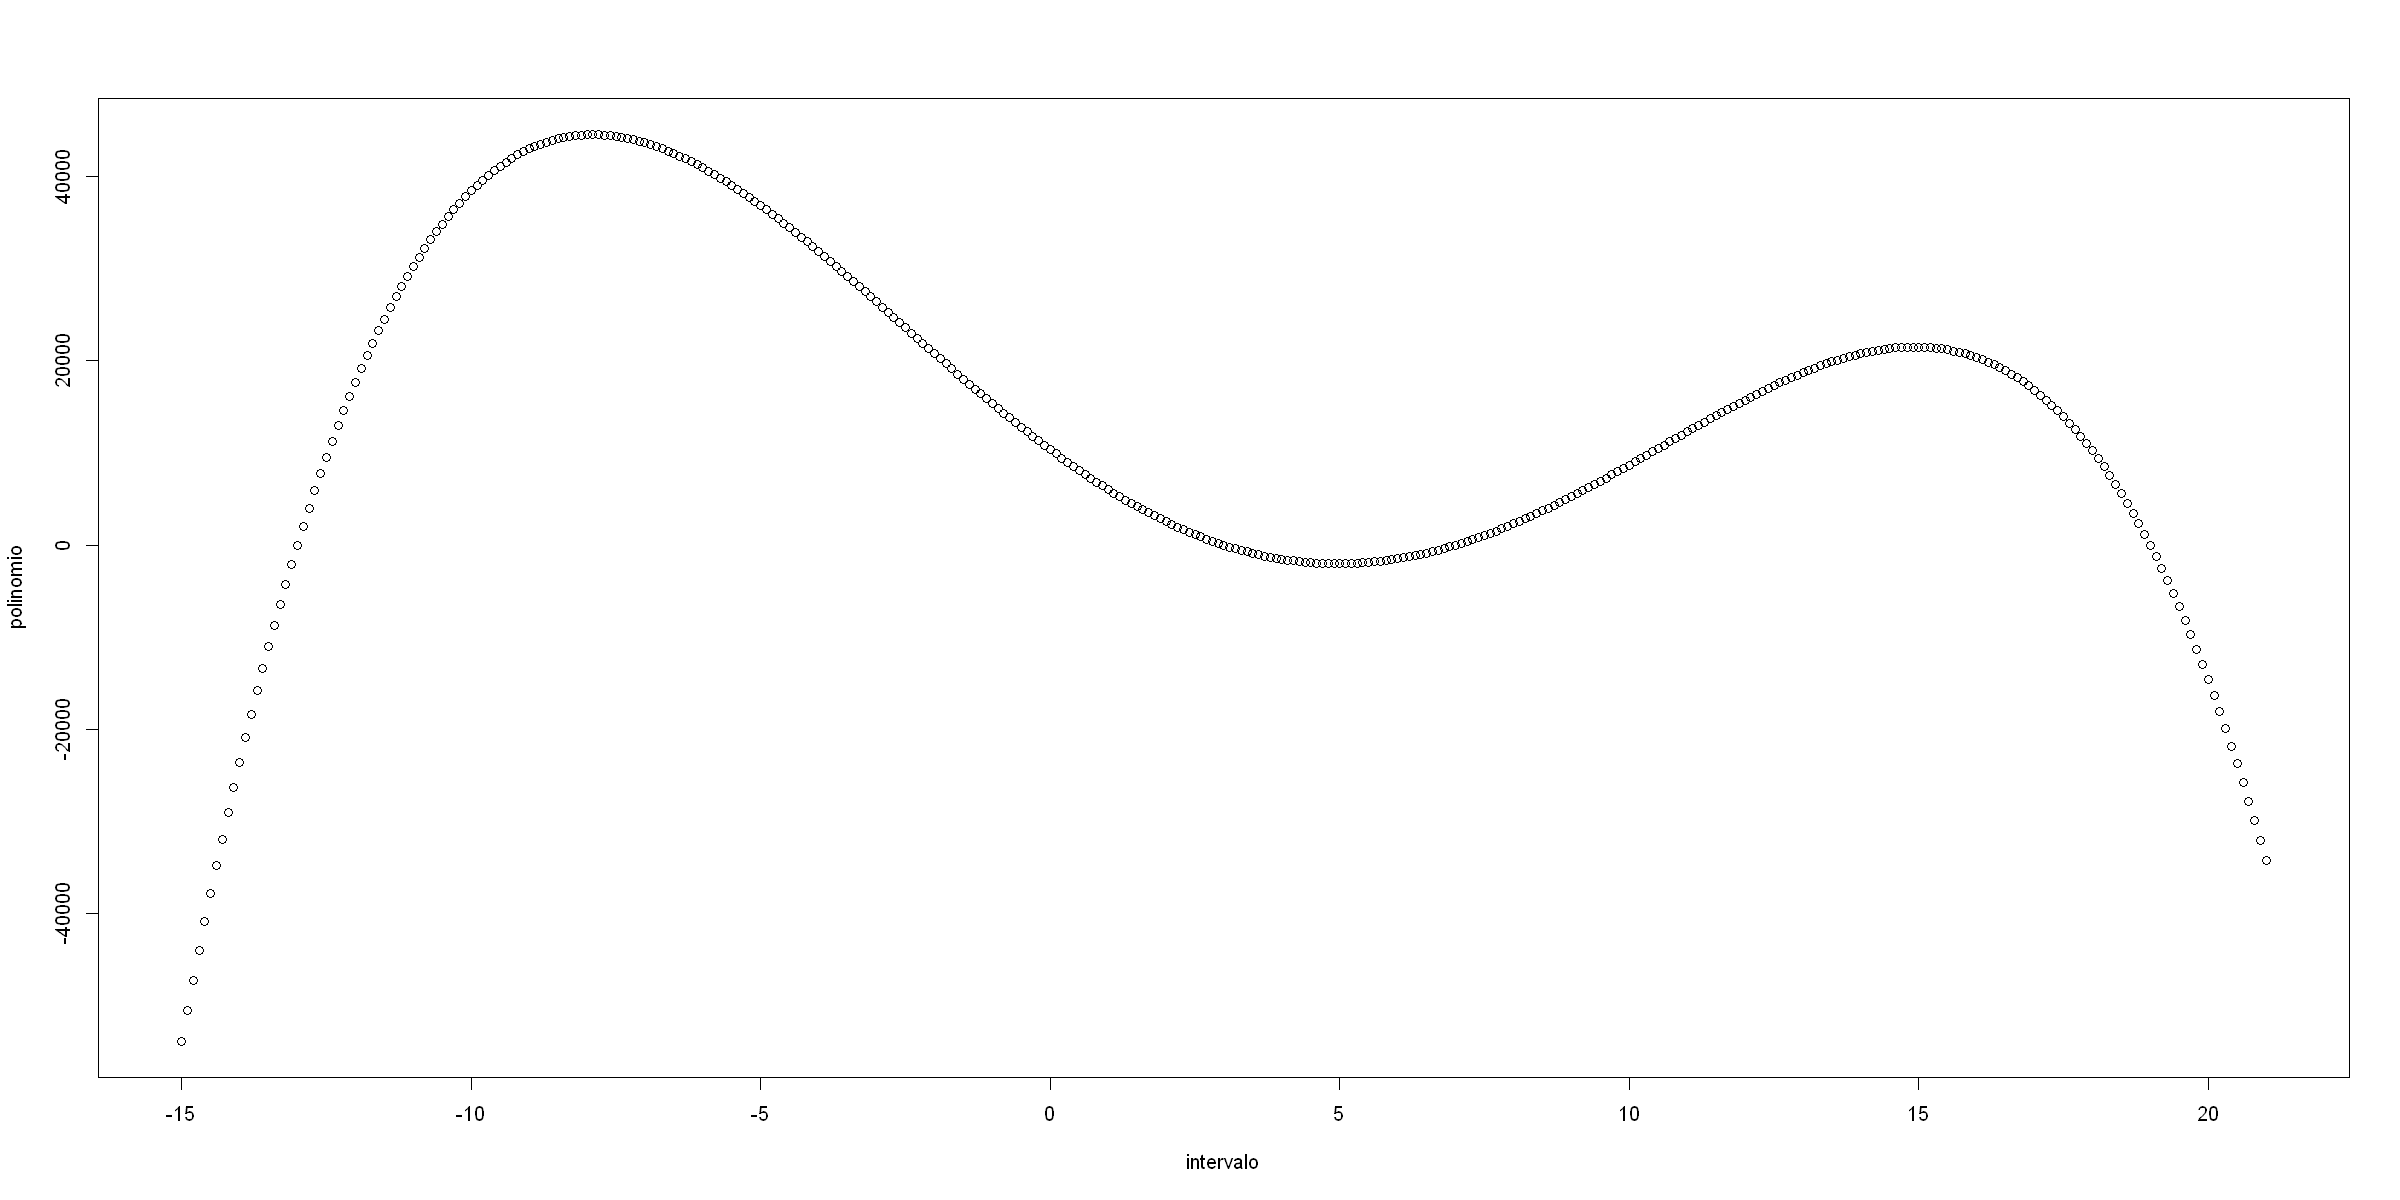

In [5]:
intervalo  <- seq(-15,21,0.1)

plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [6]:
obj.fun  <- makeSingleObjectiveFunction(
              fn=       func_univariada01,
              minimize= FALSE,   #estoy Maximizando la ganancia
              #par.set=  makeParamSet(  makeNumericParam( "x", lower= -100, upper=  100) ),
              par.set=  makeParamSet(  makeNumericParam( "x", lower= -20, upper=  22) ),
             )

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [7]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [13]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 5 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [14]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=-2.52 : y = 2.37e+04 : 0.0 secs : initdesign

[mbo] 0: x=10.9 : y = 1.19e+04 : 0.0 secs : initdesign

[mbo] 0: x=21.8 : y = -5.4e+04 : 0.0 secs : initdesign

[mbo] 0: x=-16.9 : y = -1.33e+05 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  77.35811 
  - best initial criterion value(s) :  -49.95355 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       49.954  |proj g|=     0.038561
At iterate     1  f =       49.952  |proj g|=      0.038467
At iterate     2  f =        49.83  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 49.8297

F = 49.8297
final  value 49.829656 
converged


[mbo] 1: x=8.44 : y = 3.56e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  77.35811 
  - best initial criterion value(s) :  -61.19396 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       61.194  |proj g|=     0.040445
At iterate     1  f =       61.192  |proj g|=         0.039
At iterate     2  f =        61.17  |proj g|=     0.0041173
At iterate     3  f =       61.169  |proj g|=    0.00051846
At iterate     4  f =       61.169  |proj g|=    8.8066e-06
At iterate     5  f =       61.169  |proj g|=    1.9412e-08

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.94117e-08
final functio

[mbo] 2: x=0.823 : y = 6.76e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  77.35811 
  - best initial criterion value(s) :  -72.45917 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       72.459  |proj g|=     0.048129
At iterate     1  f =       72.457  |proj g|=      0.047495
At iterate     2  f =       72.398  |proj g|=      0.013322
At iterate     3  f =       72.395  |proj g|=     0.0067852
At iterate     4  f =       72.394  |proj g|=    0.00052013
At iterate     5  f =       72.394  |proj g|=    1.8255e-05
At iterate     6  f =       72.394  |proj g|=    5.1771e-08

iterations 6
function evaluations 8
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

[mbo] 3: x=-4.74 : y = 3.56e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  77.35811 
  - best initial criterion value(s) :  -83.89144 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       83.891  |proj g|=     0.020095
At iterate     1  f =       83.891  |proj g|=       0.01971
At iterate     2  f =       83.882  |proj g|=     0.0041858
At iterate     3  f =       83.882  |proj g|=     0.0006552
At iterate     4  f =       83.882  |proj g|=    1.7953e-05
At iterate     5  f =       83.882  |proj g|=    7.9955e-08

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 7.9955e-08
final function

[mbo] 4: x=-6.36 : y = 4.21e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  77.35811 
  - best initial criterion value(s) :  -94.84889 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       94.849  |proj g|=     0.015419
At iterate     1  f =       94.849  |proj g|=      0.015207
At iterate     2  f =       94.841  |proj g|=     0.0032187
At iterate     3  f =       94.841  |proj g|=    0.00050927
At iterate     4  f =       94.841  |proj g|=    1.4142e-05
At iterate     5  f =       94.841  |proj g|=    6.4459e-08

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 6.44585e-08
final functio

[mbo] 5: x=-7.54 : y = 4.44e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  77.35811 
  - best initial criterion value(s) :  -105.2417 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       105.24  |proj g|=     0.032599
At iterate     1  f =       105.24  |proj g|=      0.031888
At iterate     2  f =       105.21  |proj g|=      0.006237
At iterate     3  f =       105.21  |proj g|=     0.0015044
At iterate     4  f =       105.21  |proj g|=    9.9196e-05
At iterate     5  f =       105.21  |proj g|=    1.7186e-06
At iterate     6  f =       105.21  |proj g|=    2.0075e-09

iterations 6
function evaluations 7
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

In [15]:
tb_resultados  <- as.data.table( run$opt.path )

In [16]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-2.5191137,23698.357,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
10.8816720,11863.109,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
21.7918319,-53999.238,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
-16.8872233,-132540.670,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
8.4434736,3557.387,1,NA,NA,0,-5309.0153,NA,0.02,infill_ei,0.20,62222.725,-37744.61
0.8225622,6759.357,2,NA,NA,0,-9316.9904,NA,0.03,infill_ei,0.19,29657.487,18274.46
-4.7380764,35627.606,3,NA,NA,0,-3025.3055,NA,0.01,infill_ei,0.17,17855.853,13034.02
-6.3589521,42111.192,4,NA,NA,0,-1983.8710,NA,0.02,infill_ei,0.17,12127.881,28123.05
-7.5445665,44418.553,5,NA,NA,0,-982.7217,NA,0.01,infill_ei,0.19,7555.775,36407.41


In [17]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-7.544566,44418.55,5,NA,NA,0,-982.7217,NA,0.01,infill_ei,0.19,7555.775,36407.41


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?